# Exploratory Data Analysis

## Loading Imports and Data

In [1]:
!python -m spacy download en_core_web_lg
!pip install squarify

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=318c91c1e571b2598547218b4a457e4b3e0ffeaf4e2552a8d8a84de36a4d6e47
  Stored in directory: /tmp/pip-ephem-wheel-cache-vslz4333/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
  Using cached https://files.pythonhosted.org/packages/0b/2b/2e77c35326efec19819cd1d729540d4d235e6c2a3f37658288a363a67da5/squarify-0.4.3-py3-none-any.whl


In [1]:
# Base
import pandas as pd
import numpy as np
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer

nlp = spacy.load('en_core_web_lg')

In [5]:
df = pd.read_csv("cannabis.csv")

In [6]:
print(df.shape)
df

(2351, 6)


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."
...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",Zeus OG is a hybrid cross between Pineapple OG...
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",Zkittlez is an indica-dominant mix of Grape Ap...
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",Zombie Kush by Ripper Seeds comes from two dif...
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",If you’re looking to transform into a flesh-ea...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2351 non-null   object 
 4   Flavor       2305 non-null   object 
 5   Description  2318 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB


## Data Cleaning/Wrangling

In [8]:
df[df['Effects']=='None'].value_counts()

Strain                Type    Rating  Effects  Flavor  Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
White-Ryder           hybrid  0.0     None     None    White Ryder is Riot Seeds’ attempt to create a ruderalis version of White Widow by crossing Buddha Seeds’ White Dwarf against Lowryder. By blending two stout, autoflowering plants, Riot Seeds created a potent indica-d

In [9]:
df['Description'].isnull().value_counts()

False    2318
True       33
Name: Description, dtype: int64

In [10]:
df[df['Description'].isnull()]

,Strain,Type,Rating,Effects,Flavor,Description
163,Banana-Candy,indica,4.2,"Relaxed,Euphoric,Uplifted,Creative,Happy","Tree,Fruit,Earthy,Sweet",NaN
368,Boysenberry,hybrid,3.6,"Giggly,Relaxed,Talkative,Energetic,Euphoric","Berry,Sweet,Earthy",NaN
594,Crater-Lake,hybrid,4.6,"Happy,Uplifted,Talkative,Relaxed,Creative","Citrus,Pine,Pungent",NaN
679,Domino,indica,4.0,"Sleepy,Happy,Tingly,Uplifted,Euphoric",NaN,NaN
736,Earthquake,hybrid,4.5,"Creative,Euphoric,Uplifted,Happy,Energetic","Woody,Pine,Earthy",NaN
817,Frosty,indica,4.4,"Sleepy,Relaxed,Creative,Hungry,Happy","Earthy,Sweet,Skunk",NaN
856,Ghost-Bubba,hybrid,4.6,"Happy,Energetic,Uplifted,Relaxed,Giggly","Sweet,Pungent,Grape",NaN
899,Goldwing,sativa,4.7,"Uplifted,Happy,Euphoric,Creative,Energetic",NaN,NaN
949,Green-Hornet,hybrid,4.2,"Euphoric,Uplifted,Relaxed,Giggly,Happy","Sweet,Woody,Pine",NaN
955,Green-Monster,hybrid,3.7,"Happy,Relaxed,Uplifted,Hungry,Giggly","Earthy,Chemical,Tar",NaN


In [11]:
df = df.dropna()

In [12]:
df.shape

(2277, 6)

In [13]:
df[df['Effects']=='None'].value_counts()

Strain                Type    Rating  Effects  Flavor  Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
White-Ryder           hybrid  0.0     None     None    White Ryder is Riot Seeds’ attempt to create a ruderalis version of White Widow by crossing Buddha Seeds’ White Dwarf against Lowryder. By blending two stout, autoflowering plants, Riot Seeds created a potent indica-d

In [14]:
df = df[df.Effects != 'None']

In [15]:
df.shape

(2200, 6)

# Natural Language Processing

In [16]:
# Instantiate Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Create description tokens
tokens = []

for doc in tokenizer.pipe(df['Description'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['Description_Tokens'] = tokens
print(df['Description_Tokens'].head())

0    [$100, OG, is, a, 50/50, hybrid, strain, that,...
1    [The, ‘98, Aloha, White, Widow, is, an, especi...
2    [1024, is, a, sativa-dominant, hybrid, bred, i...
3    [13, Dawgs, is, a, hybrid, of, G13, and, Chemd...
4    [Also, known, as, Kosher, Tangie,, 24k, Gold, ...
Name: Description_Tokens, dtype: object


In [17]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [18]:
wc = count(df['Description_Tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
27,and,2120,6929,1.0,0.041915,0.041915,0.963636
39,a,2080,5836,2.0,0.035303,0.077218,0.945455
14,the,1794,4554,3.0,0.027548,0.104766,0.815455
34,of,1870,4345,4.0,0.026284,0.131049,0.850000
46,is,2024,3631,5.0,0.021965,0.153014,0.920000


In [19]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in nlp.pipe(df['Description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.text is not '   '):
            doc_tokens.append(token.lemma_.lower())

    tokens.append(doc_tokens)

df['Description_Tokens'] = tokens
df['Description_Tokens']

0       [$, 100, og, 50/50, hybrid, strain, pack, stro...
1       [98, aloha, white, widow, especially, potent, ...
2       [1024, sativa, dominant, hybrid, breed, spain,...
3       [13, dawgs, hybrid, g13, chemdawg, genetic, br...
4       [know, kosher, tangie, 24k, gold, 60, indica, ...
                              ...                        
2346    [zeus, og,   , hybrid, cross, pineapple, og, d...
2347    [zkittlez, indica, dominant, mix, grape, ape, ...
2348    [zombie, kush, ripper, seeds, come, different,...
2349    [look, transform, flesh, eat, monster, zombie,...
2350    [zoom, pie, know, zombie, pie, heavy, indica, ...
Name: Description_Tokens, Length: 2200, dtype: object

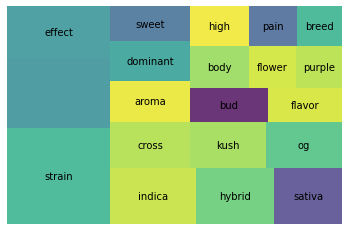

In [20]:
wc = count(df['Description_Tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [21]:
wc_top20['word']

25       strain
48             
15       effect
30       indica
7        hybrid
16       sativa
230       cross
161        kush
31           og
175       aroma
120    dominant
124       sweet
22          bud
93       flavor
33         body
6          high
152      flower
265      purple
23         pain
118       breed
Name: word, dtype: object

In [22]:
# Instantiate vectorizer
tfidf = TfidfVectorizer(stop_words = 'english',
                       #ngram_range = (1,2),
                       max_features = 5000)

# Create a vocabulary and tf-idf score per document
dtm = tfidf.fit_transform(df['Description'])
                         
# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
nn = NearestNeighbors(n_neighbors=4, algorithm='kd_tree')
nn.fit(dtm)

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(2200, 5000)


,09,10,100,1024,11,12,13,14,15,16,17,18,19,1957,1960s,1970s,1980,1980s,1989,1990s,1991,1994,1996,1997,1998,1999,1st,20,2000,2000s,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,wrapping,wreathed,wreck,wreckage,wrench,wsu,wtf,x18,xanadu,xiii,xj,xxx,year,years,yellow,yeti,yield,yielder,yielders,yielding,yields,yoda,york,yum,yumboldt,yummy,yunnan,zacatecas,zamaldelica,zealand,zelly,zen,zest,zestful,zesty,zeta,zion,zkittlez,zombie,zone
0,0.0,0.0,0.422097,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.486317,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.434774,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.13741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
ideal = ["""Indica,Relaxed,Pain,Stress,Ache,Sleep"""]

In [24]:
# Query ideal descprition
new = tfidf.transform(ideal)
new

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [25]:
nn.kneighbors(new.todense())

(array([[1.26115935, 1.28569982, 1.28801924, 1.28869852]]),
 array([[1767,  870,  727,  265]]))

In [26]:
print(df['Strain'][727])
print(df['Flavor'][727])
print(df['Effects'][727])
print(df['Description'][727])

Dutch-Treat
Sweet,Pine,Earthy
Relaxed,Happy,Euphoric,Uplifted,Focused
Over the years, Dutch Treat has become an essential strain of the Amsterdam coffee shops. The dense, sticky buds have an intense smell of sweet fruits mixed with pine and eucalyptus trees. The cerebral high comes on quick and leaves consumers feeling uplifted and euphoric while reducing stress and relaxing the mind.


In [27]:
print(df['Strain'][617])
print(df['Flavor'][617])
print(df['Effects'][617])
print(df['Description'][617])

Crown-Royale
Sweet,Flowery,Berry
Relaxed,Happy,Euphoric,Sleepy,Aroused
Crown Royale is a sweet indica-dominant hybrid that blends the best of parent strains Blueberry and Purple Kush together. This flower is a feast for the eyes with bright purple hues and deep green foliage. Just as delightful on the palate, Crown Royale exhibits notes of the forest floor with piney aromas and a telltale berry tartness. These scents show up in the flavor as a sweeter, fruiter pine. Enjoy this strain for pervasive physical effects that dull pain, nausea, and stress.    


In [28]:
print(df['Strain'][2168])
print(df['Flavor'][2168])
print(df['Effects'][2168])
print(df['Description'][2168])

Tillamook-Strawberry
Strawberry,Sweet,Berry
Happy,Relaxed,Focused,Euphoric,Energetic
Tillamook Strawberry is a mash-up between Alphakronik Genes and Dark Horse Genetics for AKG’s Collaboration Series. Described by the breeder as the “diesel lover’s dream,” Tillamook Strawberry smells like a gas station in a strawberry field. The strain’s foliage is deep green with tight buds and the effects are bright yet soothing, promoting focus and relaxation. Utilize Tillamook Strawberry to improve your mood and counter depression and anxiety. 


In [29]:
print(df['Strain'][1249])
print(df['Flavor'][1249])
print(df['Effects'][1249])
print(df['Description'][1249])

Legend-Og
Pungent,Earthy,Pine
Relaxed,Sleepy,Happy,Creative,Focused
Legend OG is a presumed OG Kush phenotype that offers a fresh take on a classic. Known for tart, floral, and pungent terpenes, Legend OG stays true to its Kush background. Heavily sedating in large doses, Legend OG works hard to relax the consumer by elevating the mind while soothing aches and pains throughout the body. Its sleepy qualities also make it a solid choice before bedtime, but monitor your dosage, as high-THC varieties can overstimulate some minds.


In [31]:
import pickle

Pkl_Filename = "nn_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(nn, file)